<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week6/Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

## 20Newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

После того как мы загрузили обучающую и тестовую часть в newsgroups_train переменной и в newsgroups_test
лежат словари, ключи этих словарей вы видите на экране. По ключу date лежат сами данные текстовые,
по ключу target лежат метки классов.

In [4]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Посмотрим то, как выглядит новостная статья. Возьмём вот
какую-то одну новостную статью из обучающей выборки. Видно, что это какая-то короткая статья
текстовая на английском языке. 

In [5]:
print (newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### 1. Предварительная обработка текста

Тексты на естественном языке могут содержать много слов, которые не
несут никакой информации об этом тексте. Например, в русском языке к таким словам можно отнести
предлоги, союзы, частицы, в английском языке к таким словам можно отнести артикли и обычно
перед тем, как осуществлять классификацию текстов,такие слова удаляют из текста. Давайте удалим эти слова
и осуществим какую-то простейшую предобработку нашего текста. Для этого напишем функцию
preprocess_text, она будет принимать на вход список текстов. в этой функции сначала в переменную
stop_word положим множество стоп-слов английского языка, это те слова как раз, которые
не несут никакой информации, мы хотим их удалить. Эти слова мы получили из библиотеки nltk - это
библиотека как раз для работы с текстами. Дальше в переменную regex сохраним регулярное выражение, и в
переменную preprocess_text создадим пустой список в эту переменную, и в переменную preprocess_text
будем как раскладывать передобработанные тексты. Далее пройдемся по всем текстам, приведем
их к нижнему регистру с помощью метода lower, каждый текст применим регулярное выражение, то
есть в этом регулярном выражении мы удалим все символы, которые не являются английскими буквами
в верхнем или нижнем регистре. Дальше токенизируем наши тексты, то есть разобьем на слова
и пройдемся по всем словам, и если эти слова находятся в списки стоп-слов, то удалим их, то
есть не будем включать в результирующей список. И на выходе получим список с предобработанными
текстами, текстами, которые будут приведены в нижний регистр, из этих текстов будут удалены все
лишние символы, то есть останутся только символы из английского алфавита, и удалим все стоп-слова.

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm


def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)

100%|██████████| 11314/11314 [00:15<00:00, 709.84it/s]


In [8]:
newsgroups_test['preprocess_data'] = preprocess_text(newsgroups_test.data)

100%|██████████| 7532/7532 [00:09<00:00, 772.31it/s]


In [9]:
print(newsgroups_train['preprocess_data'][0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


Видно, что текст полученный состоит только из английских букв, все эти буквы в нижнем
регистре, ну и нет никаких артиклей, никаких стоп-слов. В текстах на естественном языке слова могут
встречаться в разной форме, например, в русском языке одно и то же слово может встречаться в
разных склонения, в единственном или в множественном числе, но при этом оно будет значить одно и то
же, смысловая нагрузка этого слова будет одна и та же. 

И часто чтобы упростить задачу и даже
иногда чтобы повысить качество решения нашей задачи, тексты применяется стемминг или лемматизация.
Стемминг - это выделение основы слова у каждого слова в тексте. Лемматизация - это приведение
каждого слова текста к начальной форме. Давайте применим к нашим текстам стемминг. Для этого из
библиотеки nltk импортируем стеммер, напишем функцию stemming_text, который будет принимать на
вход список текстов, и к каждому тексту применим, к каждому слову этого текста применим стеммер.
То есть пройдемся циклом по всем текстам, токенизируем каждый текст, разобьем его на слова и каждому
слову применим функцию стемминга. И на выходе функции stemming_text будет возвращать список
текстов, в котором был применен стемминг к каждому слову. И применим функцию stemming_text
к преобработанным данным на обучающей и на тестовое части. 

In [10]:
from nltk.stem.lancaster import LancasterStemmer

In [11]:
def stemming_texts(texts):
  st = LancasterStemmer()
  stem_text = []
  for text in tqdm.tqdm(texts):
    word_tokens = word_tokenize(text)
    stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
  return stem_text

In [12]:
newsgroups_train['data_stemming'] = \
                           stemming_texts(newsgroups_train.preprocess_data)

100%|██████████| 11314/11314 [00:42<00:00, 268.43it/s]


In [13]:
newsgroups_test['data_stemming'] = \
                            stemming_texts(newsgroups_test.preprocess_data)

100%|██████████| 7532/7532 [00:25<00:00, 294.88it/s]


И посмотрим, что получилось,
посмотрим, что было до применения стемминга и после применения стемминга. 

In [14]:
print(newsgroups_train.data_stemming[0])

lerxst wam umd edu thing subject car nntp post host rac wam umd edu org univers maryland colleg park lin wond anyon could enlight car saw day door sport car look lat ear cal bricklin door real smal addit front bump sep rest body know anyon tellm model nam engin spec year produc car mad hist whatev info funky look car pleas e mail thank il brought neighb lerxst


In [15]:
print(newsgroups_train.preprocess_data[0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


Видно также, что все тексты
приведены к нижнему регистру, так и осталось, ну вот, например, слово posting превратилась
слова post, слово organization превратилась слова org. То есть в некоторых словах мы обрубили
окончании этих слов.

### 2. Перевод текста в вещественное пространство признаков

#### 2.1 Bag of Words (мешок слов)

Основное предположение данного метода — порядок слов в документе не важен, 

а все документы представляются в виде матрицы $ T = (t)_{d,w}$,

каждая строка в которой соответствует отдельному документу или тексту, 

а каждый столбец — определенному слову. 

Элемент $t_{d,w}$ соответствует количеству вхождений слова $w$ в документ $d$.







А в методе Bag of Words все тексты представляются
в виде матрицы, размеры этой матрицы d на w, где d - это количество документов, а w - это
количество слов, то есть каждому документу сопоставляется вектор длины, равный общему
количеству слов в текстовой выборке. И в i-ой позиции, в i-ой строке j-ом столбце этой
матрицы стоит число, которое равно количеству слова j в документе i.

Для того чтобы реализовать Bag of Words воспользуемся из
библиотеки sklearn классом CountVectorizer, импортируем этот класс и создадим объект этого класса, а теперь посмотрим
как работает CountVectorizer на простом примере.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()

In [18]:
vectorizer.fit(['порядок слов в документе не важен', 'мешок слов'])

CountVectorizer()

Обучим CountVectorizer на 2 документах: в одном
первом документе будут слова, порядок слов в документе не важен, во втором документе будут
слова, мешок слов. После того как вы обучили объект класса CountVectorizer у него есть метод
getfeaturenames. Если вы воспользуетесь этим методом, то вы получите все слова уникальные,
которые есть в вашей текстовой выборке. В данном случае у нас есть шесть уникальных слов:

In [19]:
vectorizer.get_feature_names()

['важен', 'документе', 'мешок', 'не', 'порядок', 'слов']

Теперь применим метод Bag of Words к каким-то новым текстам. Применим метод Bag of Words
к тексту "важен порядок" и "не мешок не порядок". 

In [20]:
vectorizer.transform(['важен порядок', 'не мешок не порядок']).toarray()

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 1, 2, 1, 0]])

Первому документу соответствует
вектор, в котором всего две единицы: первая единица соответствует слову "важен", вторая единице соответствует слова порядок вторая
единица соответствует слову "порядок". Вторая строка соответствует
второму документу, и в ней две единицы и одна двойка. Первая единица соответствует
слову "мешок", вторая единица соответствует слову "порядок", а двойка соответствует слову "не",
потому что слово не встретилось два раза.

Теперь напишем функцию Bag of words, которая будет принимать на вход Vectorizer,
обучающую и тестовую выборки на обучающей выборке будем применять метод
fit.transform, у Vectorizer будем применять fit.transform и в метод fit.transform
будем передавать обучающую выборку, а тестовую выборку будем тебе передавать в метод transform.
И данная функция будет возвращать полученные Bag of words матрицы для обучающий
и для тестовой части.

In [21]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [22]:
X_train_bow, X_test_bow = bow(vectorizer, 
                              newsgroups_train.data, 
                              newsgroups_test.data)

Применим функцию, написанную Bag of words, к обучающей выборке и к тестовой выборке,
причем применим к выборкам к текстовым данным, которые не были никак предобработаны.
Эти данные лежат по ключу data. Посмотрим на полученные размеры этих матриц.
Видно, что полученные размеры этих матриц, полученное признаковое пространство
в этих матрицах более 130 тысяч, ну это довольно много. 

In [23]:
X_train_bow.shape

(11314, 130107)

In [24]:
X_test_bow.shape

(7532, 130107)

Теперь посмотрим ,что происходит после
предобработки данных. Применим функцию Bag of words к предобработанным данным,
то есть тем данным, где мы все слова привели к нижнему регистру и удалили там лишние
символы, оставили только символы из английского алфавита.

In [25]:
X_train_bow_preprocess, X_test_bow_preprocess = bow(vectorizer, 
                                                    newsgroups_train.preprocess_data,
                                                    newsgroups_test.preprocess_data)

In [26]:
X_train_bow_preprocess.shape

(11314, 88863)

In [27]:
X_test_bow_preprocess.shape

(7532, 88863)

давайте посмотрим, что будет происходить, когда мы применили стемминг к нашим данным.
Признаковое пространство снизилась еще сильнее, размер признаков пространство уже чуть
более 61 000, то есть вся эта предобработка текстов, удаление стоп-слов, стемминг, помогает
нам снизить размер признакового пространства, и иногда даже повысить качеством работы наших
алгоритмов. 

In [28]:
X_train_bow_stem, X_test_bow_stem = bow(vectorizer, 
                                        newsgroups_train.data_stemming,
                                        newsgroups_test.data_stemming)

In [29]:
X_train_bow_stem.shape

(11314, 61221)

In [30]:
X_test_bow_stem.shape

(7532, 61221)

#### 2.2 Bag of Words & TF IDF

 Помимо применения метода Bag of Words можно также применять метод Bag of Words
& TF IDF преобразование. TF IDF преобразование - это некая статистическая мера, которая равна
мере TF умножить на меру IDF. TF - это чистота слова в документе то есть
она вычисляется как количество раз которые встретилось слово и делить на
общее количество слов внутри данного документа, а IDF помогает уменьшить
вес широко употребляемых слов, и IDF вычисляется по формуле логарифм
количества документов деленное на количество документов, в которых встретилось
данное слово, то есть TF IDF будет большим у тех слов, которые редко встречаются, точнее которые
часто встречаются внутри одного документа, но редко встречаются внутри других документов. А будет маленьким либо у слов, которые везде встречаются во всех документах, например, это
стоп-слова там, союзы, предлоги, частицы, либо будет маленькое у тех слов, которые очень редко
встречаются внутри одного документа.

$TF-IDF$ — это статистическая мера, используемая для оценки

важности слова в контексте документа. Вычисляется по формуле:

$$TF-IDF(w, d, D) = TF(w, d) × IDF(w, D)$$

$TF$ — частота слова, оценивает важность слова $w_i$ в пределах отдельного документа.

$$TF(w, d) = \frac{n_i}{\sum_k n_k}$$

$n_i$ — число вхождений слова $i$ в документ.

$\sum_k n_k$ — общее число слов в данном документе.

$IDF$ — обратная частота документа. 

Учёт $IDF$ уменьшает вес широко употребляемых слов.
$$IDF(w, D) = \log \frac{|D|}{|w_i \subset d_i|}, \text{где}$$

$|D|$ — количество документов в корпусе.

$|w_i \subset d_i|$ — количество документов,

в которых встречается слово $w_i$.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

Чтобы применить TF преобразования, импортируем класс
TfidfVectorizer из библиотеки sklearn и создадим объект этого класса. И вот TfidfVectorizer
имеет все те же самые методы, что и CountVectorizer, поэтому
мы можем его передавать в уже написанную нами функцию Bag of Words, передадим в функцию
Bag of Words TfidfVectorizer и так же посмотрим, что будет происходить.

In [32]:
vectorizer_tf_idf = TfidfVectorizer()

In [33]:
X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf, 
                                  newsgroups_train.data, 
                                  newsgroups_test.data)

Сначала передадим данные, в которых не было предобработки, передадим данные,
в которых была простая предобработка, то есть удаление лишних символов, приведение к
нижнему регистру, удаление стоп-слов и применим к данным, в которых мы еще применяли
стемминг. 

In [34]:
X_train_tfidf_preprocess, X_test_tfidf_preprocess = bow(vectorizer_tf_idf,
                                                        newsgroups_train.preprocess_data,
                                                        newsgroups_test.preprocess_data)

In [35]:
X_train_tfidf_stem, X_test_tfidf_stem = bow(vectorizer_tf_idf,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

Также иногда
помимо учета каждого слова необходимо еще учитывать
и n-граммы слов, так как иногда слова поодиночке не несут никакой информации о тексте.

In [36]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

Попробуем учитывать n-граммы длины 2, то есть биграммы, помимо каждого слова по отдельности
будем еще учитывать и биграммы. Также используем функцию Bag of force и передадим туда
Vectoraizer, в котором мы использовали биграммы, и применим это все к данным, к которым был
применён стемминг. Посмотрим, как изменяется размерность признакового пространства
при использовании n-грамм. Видно, что размерность признакового пространства очень
сильно возросла

In [37]:
X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram, 
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [40]:
X_train_ngram_stem.shape

(11314, 934463)

In [41]:
X_test_ngram_stem.shape

(7532, 934463)

### 3. Выбор алгоритма машинного обучения для классификации.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()

In [ ]:
clf.fit(X_train_bow, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow), newsgroups_test.target))

clf_svc.fit(X_train_bow, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow), newsgroups_test.target))

LogisticRegression:  0.8069569835369091
LinearSVC:  0.7858470525756771


In [ ]:
clf.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_preprocess),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_preprocess),
                      newsgroups_test.target))



LogisticRegression:  0.811603823685608
LinearSVC:  0.7928836962294211


In [ ]:
clf.fit(X_train_bow_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8050982474774296
LinearSVC:  0.7812002124269782


In [ ]:
clf.fit(X_train_tfidf, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf), newsgroups_test.target))

clf_svc.fit(X_train_tfidf, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf), newsgroups_test.target))

LogisticRegression:  0.8279341476367499
LinearSVC:  0.8531598513011153


In [ ]:
clf.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
        accuracy_score(clf.predict(X_test_tfidf_preprocess), 
                       newsgroups_test.target))

clf_svc.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
        accuracy_score(clf_svc.predict(X_test_tfidf_preprocess), 
                       newsgroups_test.target))

LogisticRegression:  0.831651619755709
LinearSVC:  0.8509028146574615


In [ ]:
clf.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf_stem), 
                      newsgroups_test.target))

clf_svc.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8244822092405736
LinearSVC:  0.8437334041423261


In [ ]:
clf.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_ngram_stem), 
                      newsgroups_test.target))

clf_svc.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_ngram_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8275358470525757
LinearSVC:  0.8555496548061604


In [ ]:
import seaborn
from sklearn.metrics import confusion_matrix

In [ ]:
predict_targets = clf_svc.predict(X_test_ngram_stem)

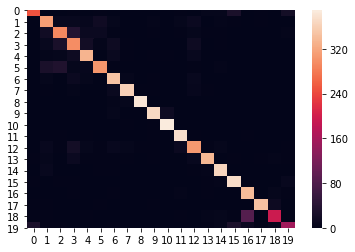

In [ ]:
seaborn.heatmap(confusion_matrix(newsgroups_test.target, predict_targets))

In [ ]:
newsgroups_test.target_names[18]

'talk.politics.misc'

In [ ]:
newsgroups_test.target_names[16]

'talk.politics.guns'

In [ ]:
ind = np.where(newsgroups_test.target != predict_targets)
ind = ind[0]
random_ind = np.random.randint(0,ind.shape[0],(2))
for i in random_ind:
    img=newsgroups_test.data[ind[i]]
    print ('Правильный класс: ', 
           newsgroups_test.target_names[newsgroups_test.target[ind[i]]])
    print ('Предсказанный класс: ', 
           newsgroups_test.target_names[predict_targets[ind[i]]])
    print(img)


Правильный класс:  comp.windows.x
Предсказанный класс:  comp.sys.mac.hardware
From: dean@gene.med.umn.edu (Dean Flanders (IHG))
Subject: Planet X
Nntp-Posting-Host: gene.med.umn.edu
Organization: University of Minnesota
X-Newsreader: TIN [version 1.1 PL9]
Lines: 28

Does any one out there have experience with Planet X, I am
considering buying it to use on a SPARCstation IPC, in this
way I can run Mac programs from the SPARC.

Would you recommend buying this piece of Software and what is
the emulation on the SPARC like?  Does it give a window of a
Mac or does it give a window of just the individual programs?

Any information would be greatly appreciated.

Thanks,

Dean

Institute of Human Genetics           I
University of Minnesota               I
Box 206 UMHC                          I    "If all you have is a hammer,
Harvard Street at East River Road     I     you tend to look at every
Minneapolis, MN  55455                I     problem as a nail."
                                   